<a href="https://www.kaggle.com/code/alirizaercan/titanic-data-science-explained-and-details?scriptVersionId=210819610" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
***We will focus Titanic dataset in this code. It is very important for all user. We can say it is basic dataset for every user. I will try to review this code from a beginner view. If you are ready, let's go!***


**We will have some parts in this code. These parts include every part of data science life cycle. If you want to be a succesfull data scientist/analyst/engineer, you shouldn't pass these life cycle steps!**

<font color = 'darkblue'>
Content:

1. [Problem Definition and Project Planning](#1)
2. [Import Libraries](#2)   
3. [Load and Check Data](#3)
4. [Understand Dataset](#4)
5. [Variable Description](#5)
6. [Exploratory Data Analysis](#6)   
    * [Univariate Variable Analysis(EDA)](#7)
7. [Basic Data Analysis](#8)
8. [Data Cleaning](#9)
    * [Outlier Detection](#10)
    * [Missing Values](#11)
9. [Feature Engineering](#12)
10. [Modeling](#13)
11. [Prediction and Submission](#14)

<a id = "1"></a><br>
# Problem Definition and Project Planning

***Problem Definition:***

The problem at hand is to build a predictive model that can answer the question: "What sorts of people were more likely to survive the sinking of the Titanic?" The sinking of the Titanic is a historical event where, due to a collision with an iceberg during its maiden voyage on April 15, 1912, a significant number of passengers lost their lives. The challenge is to analyze passenger data, including attributes such as name, age, gender, socio-economic class, etc., and predict which passengers were more likely to survive based on these characteristics.*

**Project Planning:**

* ***Understanding the Objective:***

We clearly talked about problem in the problem definition. We will focus to find the most optimum **submission.csv** file.

* ***Data Explanation:***

    ***Data Split:***

    ***The dataset is divided into two groups:***

    ***Training set (train.csv)***: Used to build machine learning models, with the ground truth provided for each passenger.

    ***Test set (test.csv)***: Used to evaluate model performance on unseen data, with no ground truth provided.

    ***Target Variable:***

    *Survival:* Binary variable indicating whether a passenger survived (1) or not (0).

    ***Key Features:***

    *Pclass:* Ticket class representing socio-economic status (1st = Upper, 2nd = Middle, 3rd = Lower).
    *Sex:* Gender of the passenger.
    *Age:* Age of the passenger in years.
    *SibSp:* # of siblings/spouses aboard the Titanic.
    Parch: # of parents/children aboard the Titanic.
    *Ticket:* Ticket number.
    *Fare:* Passenger fare.
    *Cabin:* Cabin number.
    *Embarked:* Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

    ***Variable Notes:***

    *Pclass:* A proxy for socio-economic status (SES).
    *Age:* Fractional if less than 1, or in the form of xx.5 if estimated.
    *SibSp and Parch:* Define family relations, specifying siblings, spouses, parents, and children.
    *Some children traveled only with a nanny, resulting in Parch=0 for them.*
   
* ***Import Libraries:***
    *We will import necessary libraries.*
* ***Load and Check Data:***
    *We will load and check data. We can say, we will read csv files.*
* ***Understand  Dataset:***
    *We will understand the dataset from dataframe.*
* ***Variable Description:***
    *We will review variables according to their situation: categorical or numerical.*
* ***Exploratory Data Analysis(EDA):***
    *We will understand the dataset deeper with Exploraty Data Analysis. We will focus univariate relationship. We will visualize the data. If you visualize your data you can understand your data easily.*
* ***Basic Data Analysis:***
    *We will do basic data analysis so we can understand dataset from deep side.*
* ***Data Cleaning:***
    *We will do data cleaning. This is the most important step for data science. This is %80 of the work in the projects. You cannot overlook this step. We will remove duplicates, missing values, reformat data types, check outlier and remove them, validate, if these steps are necessary.* 
* ***Feature Engineering:***
    *We will focus feature engineering for the best solution in the feature engineering. You can show your creative side in Feature Engineering.*
* ***Modelling:***
    *We will choose the best machine learning model for our data. We should choose a good model for our data. If we find the best model for our dataset, we will get a good score.*
* ***Submission File:***
    *We will create our submission file.*
    
**Now, we can start our code part according to planning steps. You will try to understand whole steps. If you understand whole steps, you can be very good data scientist. Let's start!**

<a id = "2"></a><br>
# Import Libraries
We will need some libraries in this project, we need to import necessary libraries. We didn't choose our model so we will talk about model later. We can add our machine learning model libraries later. We can add 'matplotlib', 'seaborn', 'matplotlib.pyplot', 'Counter', 'warning' libraries right now. I can explain their roles in data science like that: 

**NumPy:**
Provides efficient numerical computation capabilities for arrays and matrices.

**Pandas:**
Offers high-performance, easy-to-use data structures and data analysis tools for labeled data.

**Matplotlib:**
Creates various static, animated, and interactive visualizations for data exploration and communication.

**Seaborn:**
Builds upon Matplotlib to create high-level statistical graphics with a focus on aesthetics and ease of use.

**from collections import Counter:**
Creates a dictionary-like object (Counter) that counts the occurrences of elements in an iterable (like a list or string).

**warnings:**
Controls how Python handles warning messages.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/tmp/ipykernel_18/3803698544.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


<a id = "3"></a><br>
# Load and Check Data
We will load and check data in this step.

In [2]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
test_PassengerId = test_df["PassengerId"]

We need to assign train_df and test_df in here. It will need in the Feature Engineering!

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<a id = "4"></a><br>
# Understand Dataset
We can understand dataset with some codes and we can check the dataset.

We can see the columns of train dataset:

In [4]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

We will see the first 10 index and last 10 index in the below codes :

In [5]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


We can see statistical details about data in the below code: 

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "5"></a><br>
# Variable Description
In this step we should understand our dataset variables. If we don't understand our variables, we can't do our job with a good result!

*  **PassengerId:** unique id number to each passenger
*  **Survived:** passenger survive(1) or died(0)
*  **Pclass:** passenger class
*  **Name:** name
*  **Sex:** gender of passenger 
*  **Age:** age of passenger 
*  **SibSp:** number of siblings/spouses
*  **Parch:** number of parents/children 
*  **Ticket:** ticket number 
*  **Fare:** amount of money spent on ticket
*  **Cabin:** cabin category
*  **Embarked:** port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

We can see the detailed info about dataset variables. For example we can see data types with .info() method:

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



* int64(5): PassengerId, Survived, Pclass, SibSp, Pclass

* float64(2): Age, Fare

* object(5): Name, Sex, Ticket, Cabin, Embarked


<a id = "6"></a><br>
# Exploratory Data Analysis (EDA) 
We can understand data deeper in Exploratory Data Analysis (EDA). In this step, we will do exploratory data analysis. We will focus to univariate variable analysis. We will do some visualization according to our data. We will seperate data to categorical and numerical variables. Firstly we should look our categorical and numerical variables:


**Categorical Variables:** Survived, Pclass, Name, Sex, SibSp, Parch, Ticket, Cabin, Embarked

**Numerical Variables:** PassengerId, Age, Fare

<a id = "7"></a><br>
## Univariate Variable Analysis

Firstly we should define univariate variable analysis:
Univariate analysis is a fundamental statistical technique used to explore and understand the distribution of a single variable within a dataset. It focuses on summarizing the data, identifying patterns, and describing the characteristics of that single variable.

We separated the variables at the top. We can start with categorical variables in the below code:


### Categorical Variable

We will use bar_plot graph for analysis, we will visualize categorical variables. In this categorical variables, we will seperate some of them. We need to seperate because some of them nearly unique so we assigned them like categorical_2.

In [9]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (12,4))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

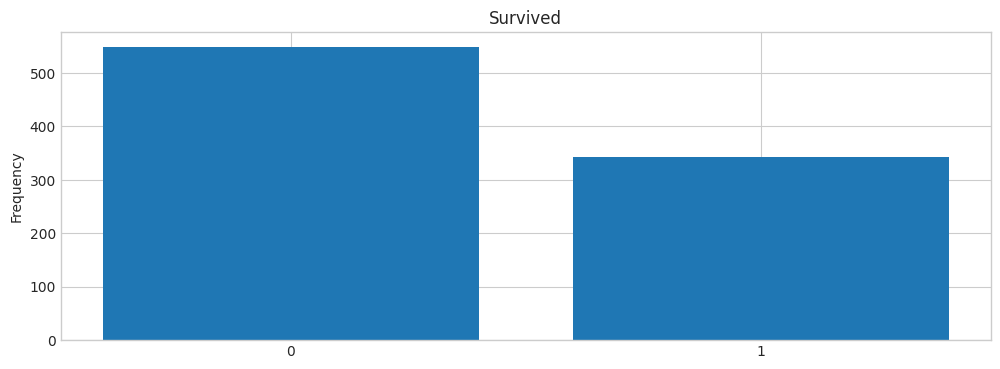

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


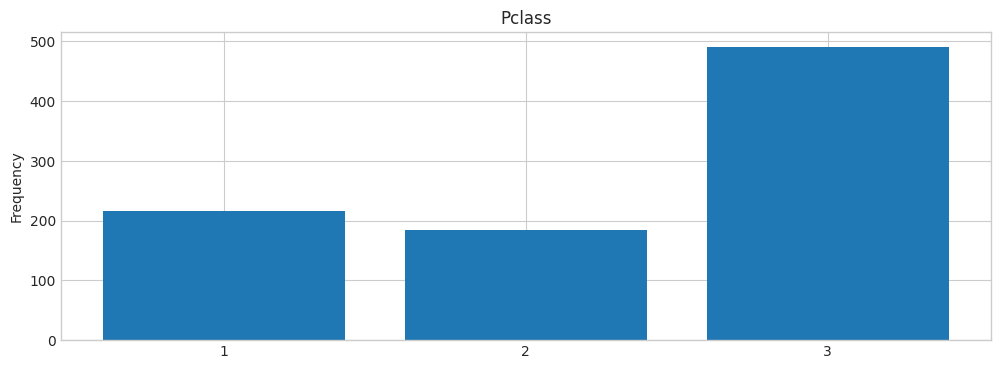

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


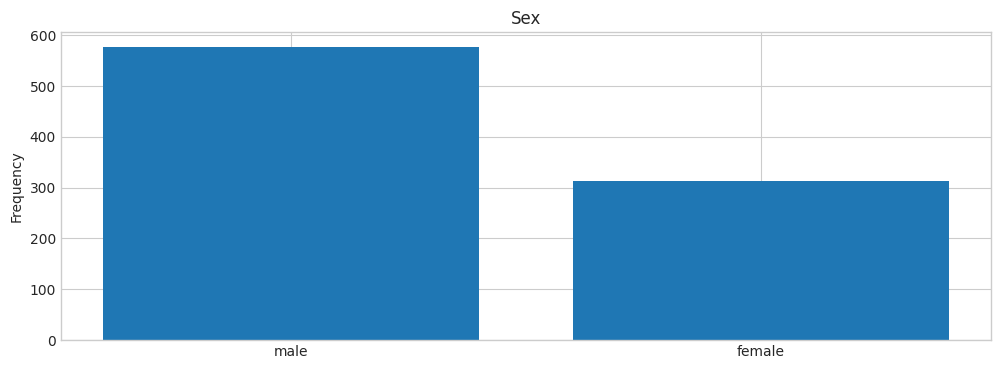

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


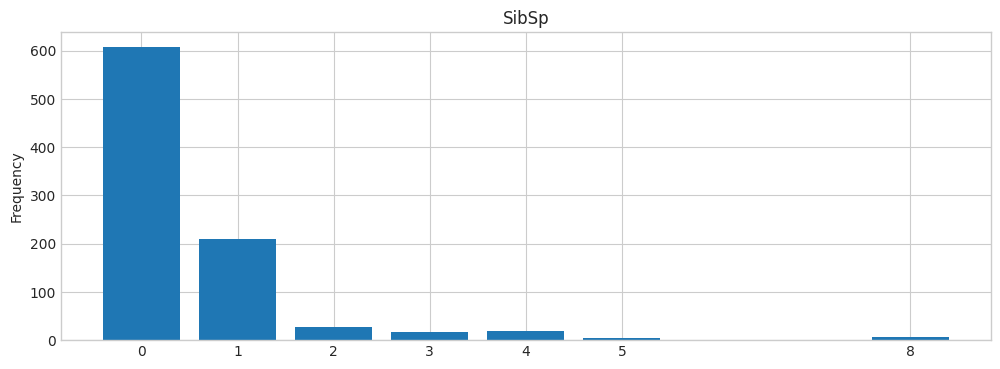

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


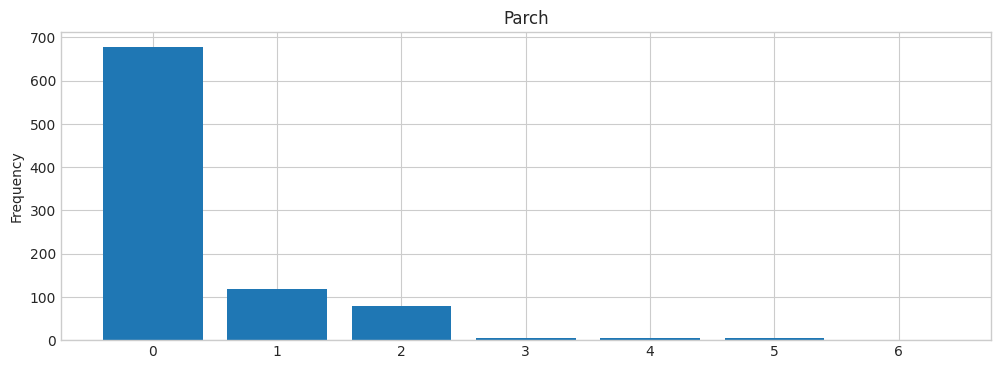

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


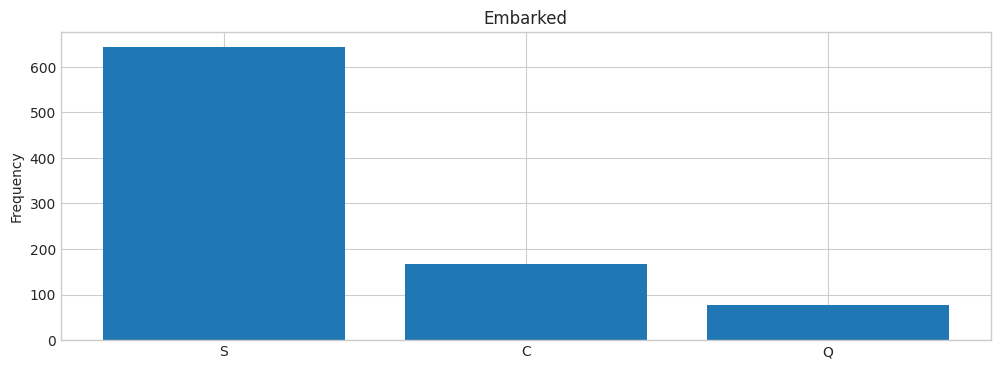

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [10]:
categorical_1 = ["Survived","Pclass","Sex","SibSp", "Parch","Embarked"]
for c in categorical_1:
    bar_plot(c)

In [11]:
categorical_2 = ["Name","Ticket","Cabin"]
for c in categorical_2:
    print("{} \n".format(train_df[c].value_counts()))

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 



### Numerical Variable

We will visualize numerical variable in this step. 

In [12]:
def plot_hist(var):
    plt.figure(figsize = (12,4))
    plt.hist(train_df[var], bins = 50)
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Hist".format(var))
    plt.show()

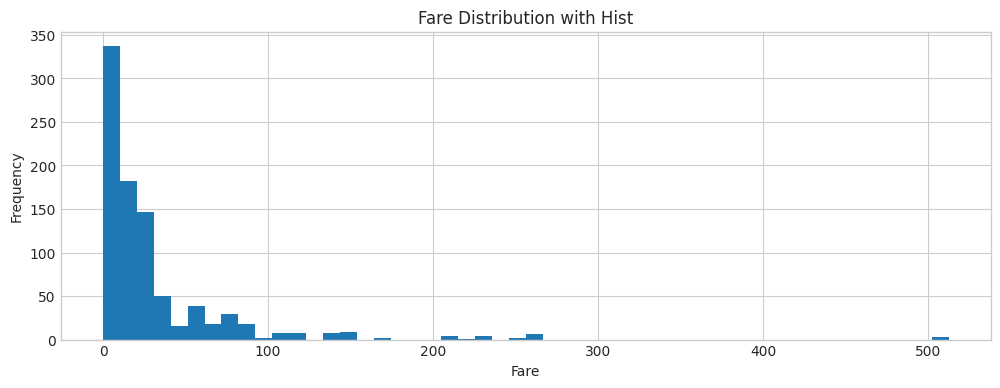

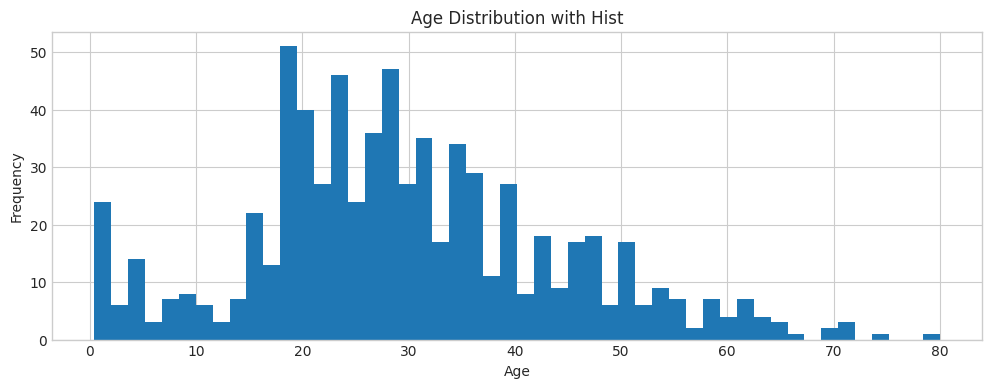

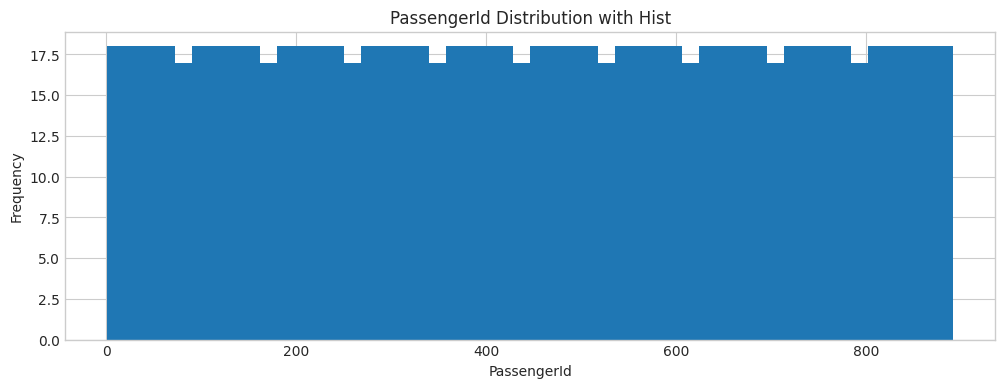

In [13]:
numeric = ["Fare", "Age","PassengerId"]
for n in numeric:
    plot_hist(n)

<a id = "8"></a><br>
# Basic Data Analysis

We will do basic data analysis. Basic data analysis serves as the foundation for understanding and extracting valuable insights from raw data. 

* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

**Pclass - Survived**

In [14]:
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Sex - Survived**

In [15]:
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**SibSp - Survived**

In [16]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="SibSp", ascending = False)

,SibSp,Survived
6,8,0.000000
5,5,0.000000
4,4,0.166667
3,3,0.250000
2,2,0.464286
1,1,0.535885
0,0,0.345395


**Parch - Survived**

In [17]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "9"></a><br>
# Data Cleaning

In the data cleaning, we have the most important step for data science lifecycle. In a lot of project, this step is %80 of the work. We will give importance because of that data cleaning step. We will apply that steps: 

* **Outlier Detection**

    We will focus IQR test for outlier detection.
    
* **Missing Values**

    We will find and fill missing values.
    
In the end of this part we will visualize some values. We will see correlation matrix.

<a id = "10"></a><br>
## Outlier Detection

We will do outlier detection. We have some outlier values in the dataset. If you pass this step, you can't have good score in your model. You shouldn't pass! 

You can find a lot of method for outlier detection like IQR, z-score etc. . We will use IQR test in this dataset.

In [18]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [19]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


We found some outlier values. We need to drop from dataset. You can see code in the below: 

In [20]:
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

We can pass another step. We detected outlier values and dropped them!

<a id = "11"></a><br>
## Missing Values

We need to check dataset that we have missing values or not! We will check. If we have, we will find them. After that we will find missing values. Some machine learning models can't fit your dataset so you need to handle with missing values! Let's find and fill them!

### Find Missing Values

In [21]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

We can see some missing value columns.

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

We can see the sum of missing values by column.

In [23]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

## Fill Missing Values

We found some missing values. We need to fill them. Let's fill!

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


We can see the missing data rows according to Embarked column in the top. Now, I want to show visualization of "Embarked" column with boxplot.

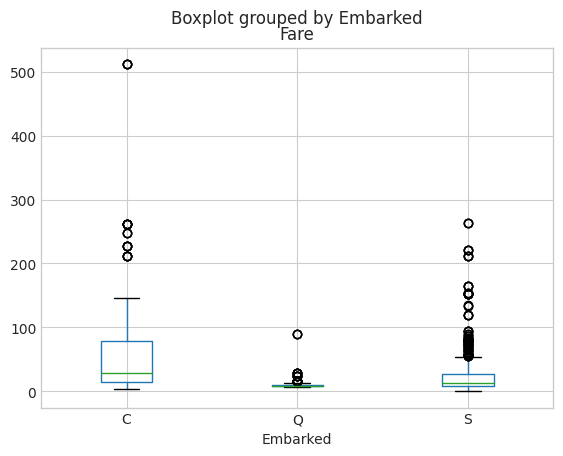

In [25]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

We can fill according to boxplot table.

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


We will fill "Age" column! Let's fill!

In [27]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


We need to see relationship of "Age" feature with other features. We will create correlation matrix in here:

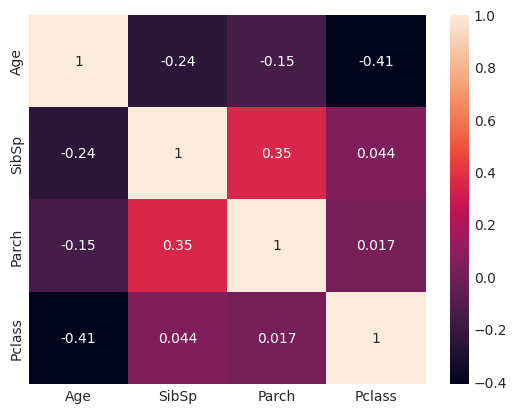

In [28]:
sns.heatmap(train_df[["Age","SibSp","Parch","Pclass"]].corr(), annot = True)
plt.show()

We will fill according to correlation relationship. Considering the correlation with these features, we can follow a method like the one below to fill in the missing values!

In [29]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [30]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


We filled all missing values for 'Age' column. We can pass Feature Engineering step!

<a id = "12"></a><br>
# Feature Engineering

We will focus feature engineering for the best solution in the feature engineering. You can show your creative side in Feature Engineering. Let's show creative side in here!

## Title & Is Married

**Title** is created by extracting the prefix before **Name** feature. According to graph below, there are many titles that are occuring very few times. Some of those titles doesn't seem correct and they need to be replaced. **Miss, Mrs, Ms, Mlle, Lady, Mme, the Countess, Dona** titles are replaced with **Miss/Mrs/Ms** because all of them are female. Values like **Mlle, Mme and Dona** are actually the name of the passengers, but they are classified as titles because **Name** feature is split by comma. **Dr, Col, Major, Jonkheer, Capt, Sir, Don and Rev** titles are replaced with **Dr/Military/Noble/Clergy** because those passengers have similar characteristics. **Master** is a *unique* title. It is given to male passengers below age 26. They have the highest survival rate among all males.

*Is_Married* is a binary feature based on the *Mrs* title. *Mrs* title has the highest survival rate among other female titles. This title needs to be a feature because all female titles are grouped with each other.

In [31]:
train_df['Title'] = train_df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]
train_df['Is_Married'] = 0
train_df['Is_Married'].loc[train_df['Title'] == 'Mrs'] = 1

In [32]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_Married
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


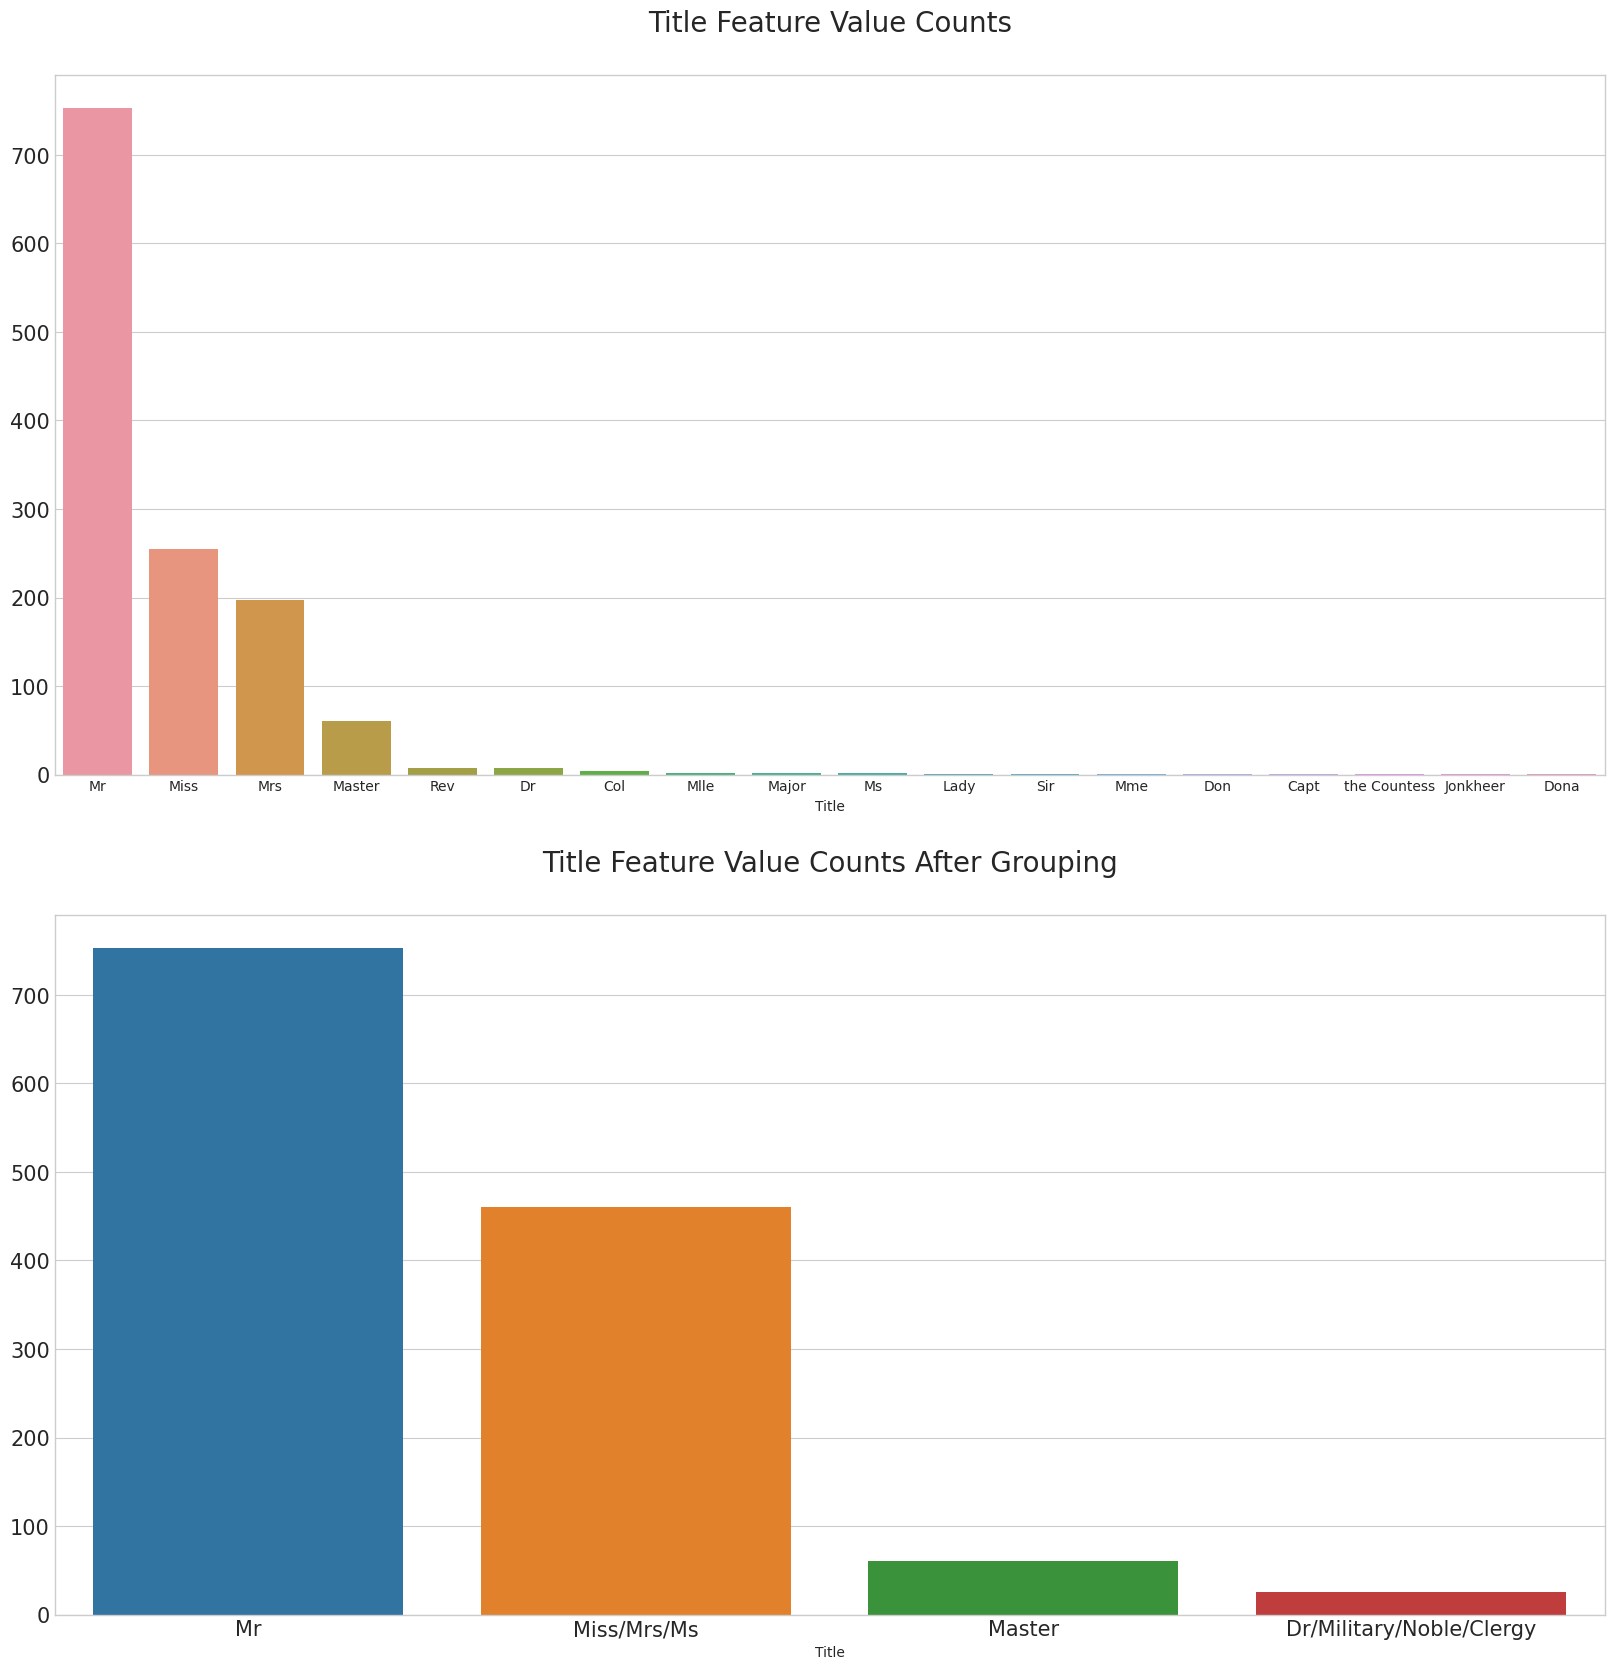

In [33]:
fig, axs = plt.subplots(nrows=2, figsize=(20, 20))
sns.barplot(x=train_df['Title'].value_counts().index, y=train_df['Title'].value_counts().values, ax=axs[0])

axs[0].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='x', labelsize=15)

for i in range(2):    
    axs[i].tick_params(axis='y', labelsize=15)

axs[0].set_title('Title Feature Value Counts', size=20, y=1.05)

train_df['Title'] = train_df['Title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
train_df['Title'] = train_df['Title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Dr/Military/Noble/Clergy')

sns.barplot(x=train_df['Title'].value_counts().index, y=train_df['Title'].value_counts().values, ax=axs[1])
axs[1].set_title('Title Feature Value Counts After Grouping', size=20, y=1.05)

plt.show()

## Family Size
**Family Size** is created by adding **SibSp, Parch and 1**. *SibSp* is the count of siblings and spouse, and *Parch* is the count of parents and children. Those columns are added in order to find the total size of families. Adding *1* at the end, is the current passenger.

In [34]:
train_df['Family_Size'] = train_df['SibSp'] + train_df['Parch'] + 1
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
train_df['Family_Size_Grouped'] = train_df['Family_Size'].map(family_map)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_Married,Family_Size,Family_Size_Grouped
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,2,Small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Miss/Mrs/Ms,1,2,Small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss/Mrs/Ms,0,1,Alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss/Mrs/Ms,1,2,Small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,Alone


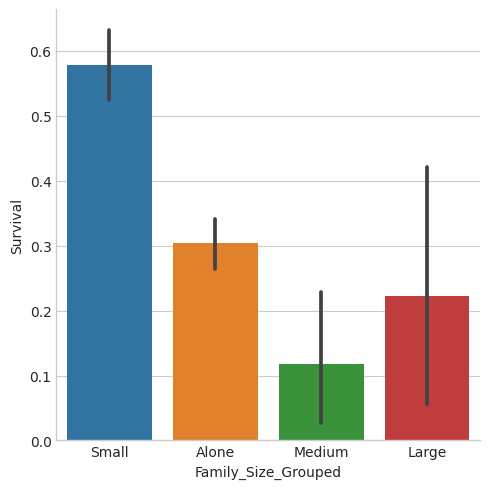

In [35]:
g = sns.catplot(x="Family_Size_Grouped", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

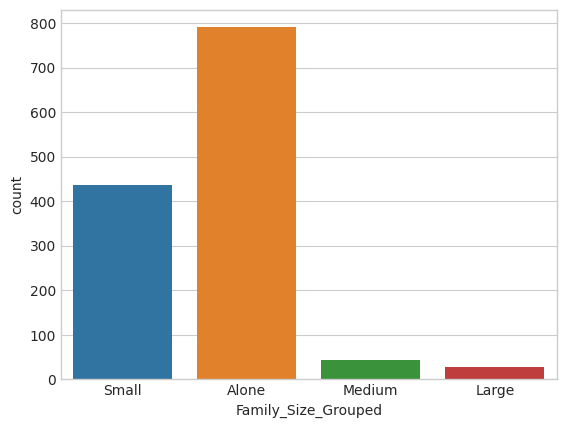

In [36]:
sns.countplot(x = "Family_Size_Grouped", data = train_df)
plt.show()

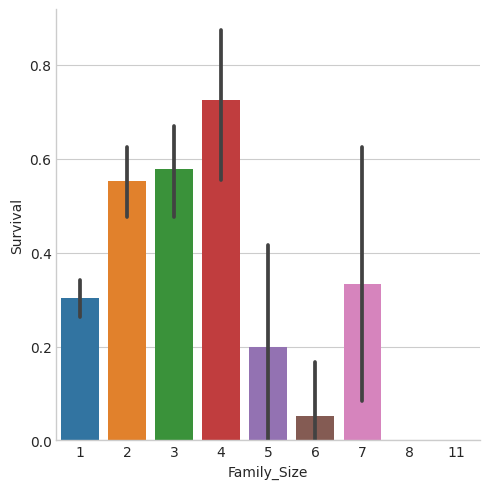

In [37]:
g = sns.catplot(x = "Family_Size", y = "Survived", data = train_df, kind = "bar")
g.set_ylabels("Survival")
plt.show()

As you can see in the graph, small families can live with a big possibility.

## Ticket
There are too many unique **Ticket** values to analyze, so grouping them up by their frequencies makes things easier.

How is this feature different than **Family_Size**? Many passengers travelled along with groups. Those groups consist of friends, nannies, maids and etc. They weren't counted as family, but they used the same ticket.

Why not grouping tickets by their prefixes? If prefixes in **Ticket** feature has any meaning, then they are already captured in **Pclass** or **Embarked** features because that could be the only logical information which can be derived from the **Ticket** feature.

In [38]:
train_df['Ticket_Frequency'] = train_df.groupby('Ticket')['Ticket'].transform('count')

In [39]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Is_Married,Family_Size,Family_Size_Grouped,Ticket_Frequency
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0,2,Small,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Miss/Mrs/Ms,1,2,Small,2
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss/Mrs/Ms,0,1,Alone,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Miss/Mrs/Ms,1,2,Small,2
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,1,Alone,1


## Feature Transformation
We will do feature transformation for these features. Some models don't fit for categorical values. This is the best thing we can do! Let's do!
### Label Encoding Non-Numerical Features
**Embarked, Sex, Title and Family_Size_Grouped** are object type, and **Age** and **Fare** features are category type. They are converted to numerical type with **LabelEncoder**. **LabelEncoder** basically labels the classes from 0 to n. This process is necessary for models to learn from those features.

Firstly, we need to import some libraries for feature transformation! Let's implement!

In [40]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [41]:
non_numeric_features = ['Embarked', 'Sex', 'Title', 'Family_Size_Grouped','Age', 'Fare']

label_encoder = LabelEncoder()

for column in non_numeric_features:
    train_df[column] = label_encoder.fit_transform(train_df[column])

### One-Hot Encoding the Categorical Features
The categorical features (**Pclass, Sex, Deck, Embarked, Title**) are converted to one-hot encoded features with **OneHotEncoder**. **Age** and **Fare** features are not converted because they are ordinal unlike the previous ones.

In [42]:
cat_features = ['Pclass', 'Sex', 'Embarked', 'Title', 'Family_Size_Grouped']
one_hot_encoder = OneHotEncoder()
encoded_features = one_hot_encoder.fit_transform(train_df[cat_features]).toarray()

column_names = []
for i, column in enumerate(cat_features):
    unique_labels = train_df[column].unique()
    
    names = [f"{column}_{label}" for label in unique_labels]
    column_names.extend(names)

one_hot_encoded_df = pd.DataFrame(encoded_features, columns=column_names)

train_df = pd.concat([train_df, one_hot_encoded_df], axis=1)

In [43]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_0,Embarked_1,Title_3,Title_2,Title_1,Title_0,Family_Size_Grouped_3,Family_Size_Grouped_0,Family_Size_Grouped_2,Family_Size_Grouped_1
0,1,0.0,3,"Braund, Mr. Owen Harris",1,33,1,0,A/5 21171,20,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,59,1,0,PC 17599,237,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,40,0,0,STON/O2. 3101282,50,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,54,1,0,113803,217,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,0.0,3,"Allen, Mr. William Henry",1,54,0,0,373450,52,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5,6,0.0,3,"Moran, Mr. James",1,39,0,0,330877,60,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,78,0,0,17463,214,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,8,3,1,349909,143,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,42,0,2,347742,87,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,22,1,0,237736,177,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Drop Passenger ID and Cabin
We need to drop 'PassengerId' and 'Column' columns. We don't need that columns. They are unnecessary for models! 

In [44]:
train_df.drop(labels = ["PassengerId", "Cabin", "Name", "Ticket"], axis = 1, inplace = True)

In [45]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Is_Married,...,Embarked_0,Embarked_1,Title_3,Title_2,Title_1,Title_0,Family_Size_Grouped_3,Family_Size_Grouped_0,Family_Size_Grouped_2,Family_Size_Grouped_1
0,0.0,3,1,33,1,0,20,2,3,0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,1,0,59,1,0,237,0,2,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,3,0,40,0,0,50,2,2,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1,0,54,1,0,217,2,2,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,3,1,54,0,0,52,2,3,0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [46]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Is_Married', 'Family_Size', 'Family_Size_Grouped',
       'Ticket_Frequency', 'Pclass_3', 'Pclass_1', 'Pclass_2', 'Sex_1',
       'Sex_0', 'Embarked_2', 'Embarked_0', 'Embarked_1', 'Title_3', 'Title_2',
       'Title_1', 'Title_0', 'Family_Size_Grouped_3', 'Family_Size_Grouped_0',
       'Family_Size_Grouped_2', 'Family_Size_Grouped_1'],
      dtype='object')

We need to do last thing before model!

<a id = "13"></a><br>
# Modeling
We will put model for our dataset. We completed all processes for our dataset! Firstly we will seperate train-test split.

We need to import some libraries for machine learning models!

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

## Train - Test Split

In [48]:
test = train_df[train_df_len:]
test.drop("Survived", axis=1, inplace=True)

In [49]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Is_Married,Family_Size,...,Embarked_0,Embarked_1,Title_3,Title_2,Title_1,Title_0,Family_Size_Grouped_3,Family_Size_Grouped_0,Family_Size_Grouped_2,Family_Size_Grouped_1
881,3,1,53,0,0,43,1,3,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
882,3,0,71,1,0,12,2,2,1,2,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
883,2,1,88,0,0,77,1,3,0,1,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
884,3,1,42,0,0,63,2,3,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
885,3,0,33,1,1,93,2,2,1,3,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,3,1,39,0,0,52,2,3,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1295,1,0,61,0,0,261,0,2,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1296,3,1,60,0,0,20,2,3,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1297,3,1,39,0,0,52,2,3,0,1,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [50]:
train = train_df[:train_df_len]
X_train = train.drop("Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test_df))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


In [51]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier()
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f'{model_name}: Accuracy = {accuracy:.4f}')

Logistic Regression: Accuracy = 0.8351
Decision Tree: Accuracy = 0.7938
Random Forest: Accuracy = 0.8007
SVM: Accuracy = 0.6529
KNN: Accuracy = 0.6667
XGBoost: Accuracy = 0.8144


We can choose Logistic Regression. Logistic Regression gives the best accuracy_score in the titanic dataset!

We trained Logistic Regression for titanic dataset in the below code!

In [52]:
logistic_regression = LogisticRegression()
logistic_regression = logistic_regression.fit(X_train, y_train)
print(accuracy_score(logistic_regression.predict(X_test),y_test))

0.8350515463917526


<a id = "14"></a><br>
# Prediction and Submit
We will predict and submit our .csv file. We can finish this notebook in here!

In [53]:
test_survived = pd.Series(logistic_regression.predict(test), name = "Survived").astype(int)
results = pd.concat([test_PassengerId, test_survived],axis = 1)
results.to_csv("submission.csv",header=True, index = False)

I hope this notebook can be helpful for your data scientist journey!

> Respects,
> Ali Riza Ercan

                                                                   